In [311]:
import matplotlib.pyplot as plt
import numpy as np
from csv import reader

class Plot_HC():
    def Tplot(self, material_no, file_name):
        fig = plt.figure()
        fig.set_size_inches(18.5, 10.5)
        ax = fig.add_subplot(1, 1, 1)
        
        # Methane
#         A = 1.702
#         B = 9.081e3
#         C = -2.164e6
#         D = 0
        
        data = FileIO().organize_files(file_name)
        
        print "[Material, Chemical formula, T max, HC at T = 298, A, 10^3 B, 10^6 C, 10^-5 D]"
        print data[material_no]
        funct = np.empty(0)
        Trange = np.arange(298, float(data[material_no][2]))
        
        A = float(data[material_no][4])
        B = float(data[material_no][5]) * 10**3
        C = float(data[material_no][6]) * 10**6
        D = float(data[material_no][7]) / 10**5
        
        for temp in np.nditer(Trange):
            funct = np.append(funct, Calculate_HC().calc(A, B, C, D, temp))
        
        material = data[material_no][0]
        
        title = "Heat Capacity of " + material.title()
        
        ax.set_ylim(min(funct), max(funct))
        ax.set_xlim(min(Trange), max(Trange))

        ax.grid(which='major', alpha=0.5)
        ax.set_title(title)
        ax.set_xlabel("Temperature (K)")
        ax.set_ylabel("Heat Capacities (C)")
        plt.plot(Trange, funct)
        
class Calculate_HC():
    def calc(self, A, B, C, D, temp):
        return A + B*temp + C*temp**2 + D / temp**2
    
class FileIO():
    def organize_files(self, text_file):
        txt = open(text_file)
#         txt_arr = txt.readlines()
        all_data = []
   
        for line in reader(txt):
            if '' in line:
                for i, val in enumerate(line):
                    if val == '':
                        line[i] = 0
                
            if len(line) > 8:
                for i in range(8, len(line)):
                    line.pop(i)
                    
            all_data.append(line)
        
#         for i in range(0, len(txt_arr)):
#             if "\"" in txt_arr[i]:
#                 print txt_arr[i]
#                 all_data.append(txt_arr[i].rsplit('"'))
#                 print "**", all_data[i]
                
# #             else:
#             all_data.append(txt_arr[i].split(','))
            
#             if '\n' in all_data[i]:
#                 all_data[i][all_data[i].index('\n')] = 0
            
#         if '' in all_data[i]:
#             all_data[i][all_data[i].index('')] = 0
                
#         if len(all_data[i]) > 8:
#             for j in range (8, len(all_data[i])):
#                 all_data[i].pop(j)

        return all_data

class HeatCap():
    def choose_mater(self, text_file):
        data = FileIO().organize_files(text_file)
        ask_again = True
        prompt = '> '
        
        while ask_again:
            print """Enter in the material OR chemical formula to plot? (M) Material
                                                   (CF) Chemical Formula"""
            choice = raw_input(prompt)
            
            if choice.lower() == 'm':
                print "Enter the material to plot:"
                mater = raw_input(prompt)

                for i in range(0, len(data)):
                    if data[i][0].lower() == mater.lower():
                        Plot_HC().Tplot(i, text_file)
                        return
                    else:
                        continue


                print "The material you have entered in not available. Try again? (Y)(N)"   
                repeat = raw_input(prompt)

                if repeat.lower() == 'n':
                    ask_again = False
                else:
                    continue
                    
            elif choice.lower() == 'cf':
                print "Enter the chemical formula to plot:"
                chemf = raw_input(prompt)
                ask_butane = True
            
                if chemf.lower() == 'c4h10':
                    print "(1) n-Butane OR (2) iso-Butane"
                    butane = float(raw_input(prompt))

                    if butane == 1:
                        Plot_HC().Tplot(3, text_file)
                        ask_butane = False
                        return
                    elif butane == 2:
                        Plot_HC().Tplot(4, text_file)
                        ask_butane = False
                        return
                    else:
                        print "Please enter (1) or (2) only."
                else:
                    for i in range(0, len(data)):
                        if HeatCap().iequal(chemf, data[i][1]):
                            Plot_HC().Tplot(i, text_file)
                            return
                        else:
                            continue

                    print "The chemical formula you have entered in not available. Try again? (Y)(N)"   
                    repeat = raw_input(prompt)

                    if repeat.lower() == 'n':
                        ask_again = False
                    else:
                        continue
            else:
                print "That is not a valid choice. Please try again."
                
    def iequal(self, a, b):
        try:
            return a.upper() == b.upper()
        except AttributeError:
            return a == b


                

Enter in the material OR chemical formula to plot? (M) Material
                                                   (CF) Chemical Formula
> M
Enter the material to plot:
> Propane
[Material, Chemical formula, T max, HC at T = 298, A, 10^3 B, 10^6 C, 10^-5 D]
['Propane', 'C3H8', '1500', '9.011', '1.213', '28.785', '-8.824', 0]


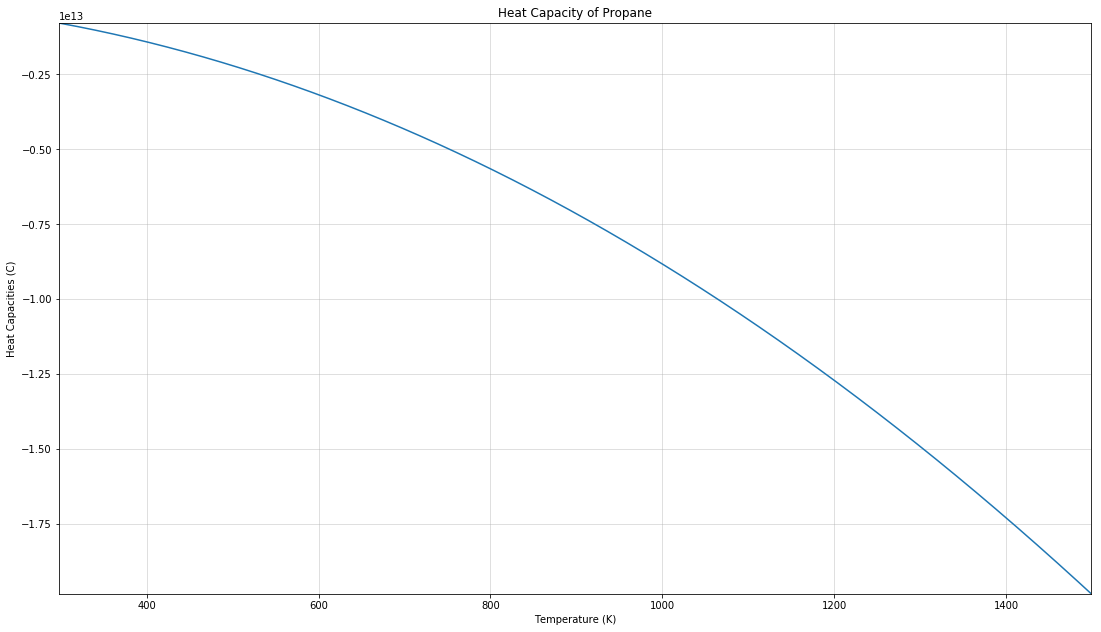

In [316]:
#FileIO().organize_files('LKtables/CPtable.csv')
#Plot_HC().Tplot(28, 'LKtables/CPtable.csv')

HeatCap().choose_mater('LKtables/CPtable.csv')